# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [22]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [23]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [24]:
reg1 = smf.ols('tip ~ net_bill', data = tips).fit() 
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 02 May 2023   Prob (F-statistic):           5.02e-23
Time:                        18:50:56   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 10.45)

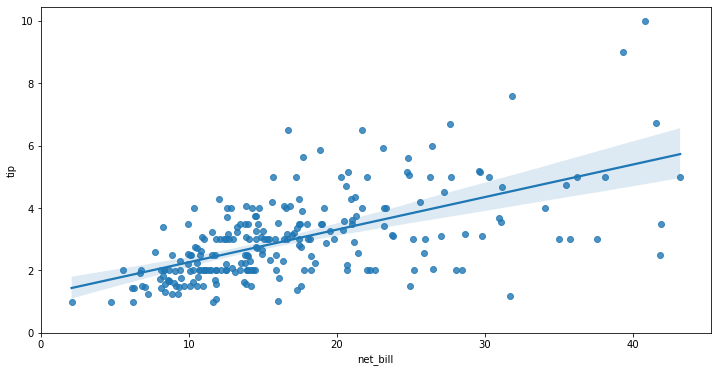

In [25]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [26]:
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit() 
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.52e-06
Time:                        18:50:57   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.505398619388979)

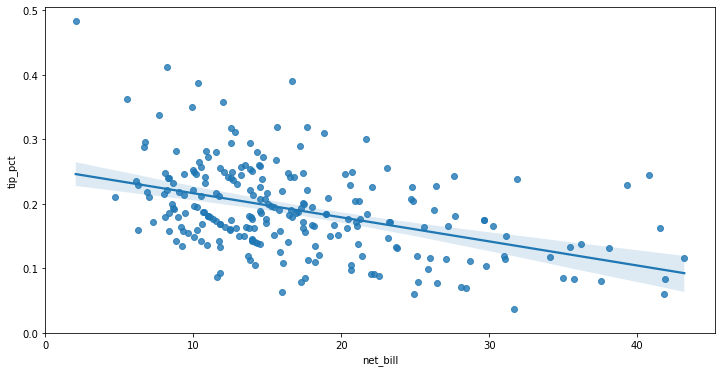

In [27]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

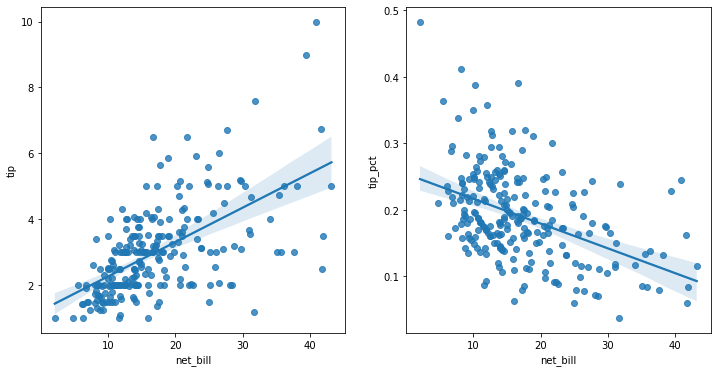

In [28]:
plt.rc('figure', figsize=(12, 6))

fig, axes = plt.subplots(1, 2)

# Gráfico 1: tamanho da mesa
ax1 = axes[0]
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5],ax = ax1)

# Gráfico 2: dia da semana
ax2 = axes[1]
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5], ax = ax2) 




Ao utilizar o valor da gorjeta temos um correlação positiva com o valor da conta, já no gráfico do percentual da goreta em relação a conta vemos uma correlação negativa com o valor da conta

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [29]:
# 1.obtenha o valor predito pred para tip_pct (dica, veja o atributo reg.fittedvalues)
tips_2 =  tips
tips_2['tip_pct_predict'] = reg2.fittedvalues

tips.head(10)



,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_predict
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358
5,25.29,4.71,Male,No,Sun,Dinner,4,0.228863,20.58,0.178817
6,8.77,2.00,Male,No,Sun,Dinner,2,0.295421,6.77,0.263690
7,26.88,3.12,Male,No,Sun,Dinner,4,0.131313,23.76,0.159273
8,15.04,1.96,Male,No,Sun,Dinner,2,0.149847,13.08,0.224910
9,14.78,3.23,Male,No,Sun,Dinner,2,0.279654,11.55,0.234313


In [30]:
#2. Obtenha o valor predito para tip como tip_pct * net_bill
tips_2 ['tip_predict'] = tips_2['tip_pct_predict'] * tips_2['net_bill']
tips_2.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pct_predict,tip_predict
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358,3.699998
5,25.29,4.71,Male,No,Sun,Dinner,4,0.228863,20.58,0.178817,3.680047
6,8.77,2.00,Male,No,Sun,Dinner,2,0.295421,6.77,0.263690,1.785180
7,26.88,3.12,Male,No,Sun,Dinner,4,0.131313,23.76,0.159273,3.784329
8,15.04,1.96,Male,No,Sun,Dinner,2,0.149847,13.08,0.224910,2.941822
9,14.78,3.23,Male,No,Sun,Dinner,2,0.279654,11.55,0.234313,2.706315


In [32]:
#calcule o  𝑅2 do modelo para tip
reg2.rsquared


0.09129084920662944

In [33]:
#compare esse  𝑅2 com o do item 1
print(reg1.rsquared)
print (reg2.rsquared)

0.3325407312323706
0.09129084920662944
